In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
from Libraries_functions import *
from tqdm import tqdm

In [3]:
inputs1,targets1, classes1=load_data("../../Datasets/Data/data400_3.0_Noise_MFCC_NMFCC128_NFFT255_HOPLENGTH502.json")
inputs2,targets2, classes2=load_data("../../Datasets/Data/data400_3.0_Noise_MFCC_NMFCC128_NFFT255_HOPLENGTH502.json")
inputs3,targets3, classes3=load_data("../../Datasets/Data/data400_3.0_Noise_MFCC_NMFCC128_NFFT255_HOPLENGTH502.json")

inputs = np.concatenate((inputs1, inputs2, inputs3), axis=0)
targets = np.concatenate((targets1, targets2, targets3), axis=0)
classes = np.concatenate((classes1, classes2, classes3), axis=0)



In [4]:
type(classes)

numpy.ndarray

In [5]:
print("Selecciona si normalizar o no:")
print("-Normalizar: 1")
print("-No normalizar: 0")
normalizar=1
if normalizar== 1:
    for i in range(len(inputs)):
        scalerX = MinMaxScaler()
        inputs[i]=scalerX.fit_transform(inputs[i])

    # for i in range(len(targets)):
    #     scalery = MinMaxScaler()
    #     targets[i]=scalery.fit_transform(targets[i]) 


Selecciona si normalizar o no:
-Normalizar: 1
-No normalizar: 0


## Reshape para modelo de Convolucion

In [6]:
# X = np.reshape(inputs, (np.shape(inputs)[0], np.shape(inputs)[1],np.shape(inputs)[2],1))
# y = classes

# np.shape(X)

## Reshape para modelo LSTM

In [7]:
X = np.reshape(inputs, (np.shape(inputs)[0], np.shape(inputs)[1],np.shape(inputs)[2]))
y = classes

np.shape(X)

(600, 128, 96)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

In [9]:
print("Shape X: ",np.shape(X_train))

Shape X:  (160, 128, 96)


In [10]:
print("Shape y:", np.shape(y_train))

Shape y: (160,)


In [11]:
y_train

array([1, 3, 3, 1, 3, 0, 2, 2, 2, 0, 3, 0, 3, 2, 2, 3, 2, 3, 3, 0, 2, 1,
       1, 2, 3, 2, 2, 3, 3, 1, 3, 0, 2, 3, 1, 0, 0, 2, 2, 1, 2, 0, 3, 0,
       1, 0, 2, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 0, 3, 2, 0, 0, 1, 3, 2, 1, 1, 2, 0, 2, 1, 3, 0, 0, 2,
       3, 0, 1, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 0, 0, 0, 3, 0, 1, 3, 3,
       1, 3, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 3, 1, 2, 2,
       0, 2, 1, 3, 2, 2, 2, 1, 0, 0, 3, 1, 1, 3, 3, 3, 3, 2, 1, 3, 0, 3,
       2, 3, 2, 2, 3, 3])

In [7]:
ruta="./models/"
learning_rates = 0.0005
batch_hyper = 32
epoch_hyper= 80
loss_hyper="sparse_categorical_crossentropy"
optimizer_hyper=tf.keras.optimizers.Adam
nombre=None

## Model fit of conv2d

In [8]:
model = unet((160, 128, 96))
opti = optimizer_hyper(learning_rate=0.0001)
model.compile(optimizer=opti, loss=loss_hyper, metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 96, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 48, 16)        416       
                                                                 
 batch_normalization_5 (Batc  (None, 64, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 48, 16)        0         
                                                                 
 dropout_5 (Dropout)         (None, 64, 48, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 24, 32)        12832     
                                                           

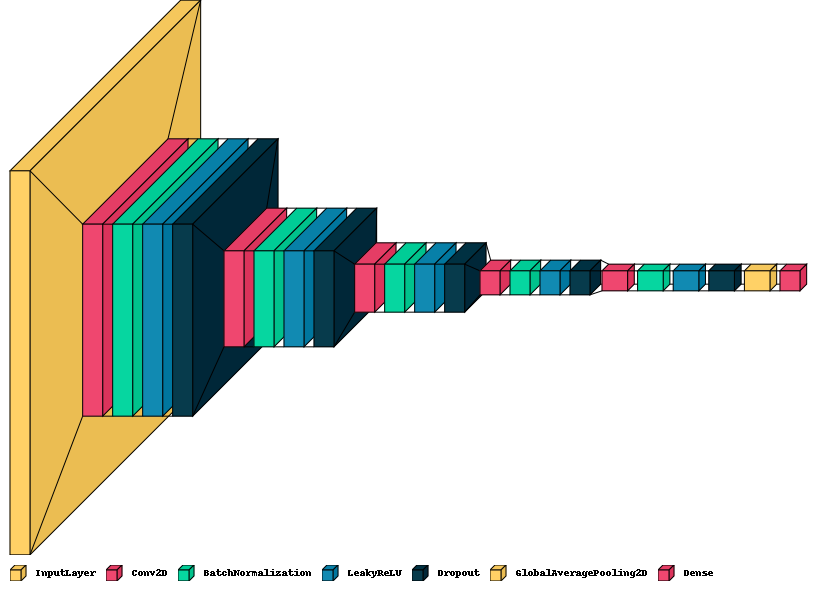

In [10]:
import visualkeras
visualkeras.layered_view(model, legend=True)  # font is optional!

## Model fit of CNN + LSTM

In [13]:
model = CNN_lstm((160, 128, 96))
opti = optimizer_hyper(learning_rate=learning_rates)
model.compile(optimizer=opti, loss=loss_hyper, metrics=["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 96, 1)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 48, 16)        416       
                                                                 
 batch_normalization_10 (Bat  (None, 64, 48, 16)       64        
 chNormalization)                                                
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64, 48, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 24, 32)        12832     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 24, 32)       128       
 chNormalization)                                          

In [14]:
import visualkeras
visualkeras.layered_view(model, legend=True)  # font is optional!

TypeError: 'int' object is not iterable

## Model fit of LSTM

In [11]:
model = RNN_lstm((160, 128, 96))
opti = optimizer_hyper(learning_rate=0.0001)
model.compile(optimizer=opti, loss=loss_hyper, metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 96)]         0         
                                                                 
 lstm (LSTM)                 (None, 128)               115200    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 48)                3120

In [12]:
import visualkeras
visualkeras.layered_view(model, legend=True)  # font is optional!

TypeError: 'int' object is not iterable

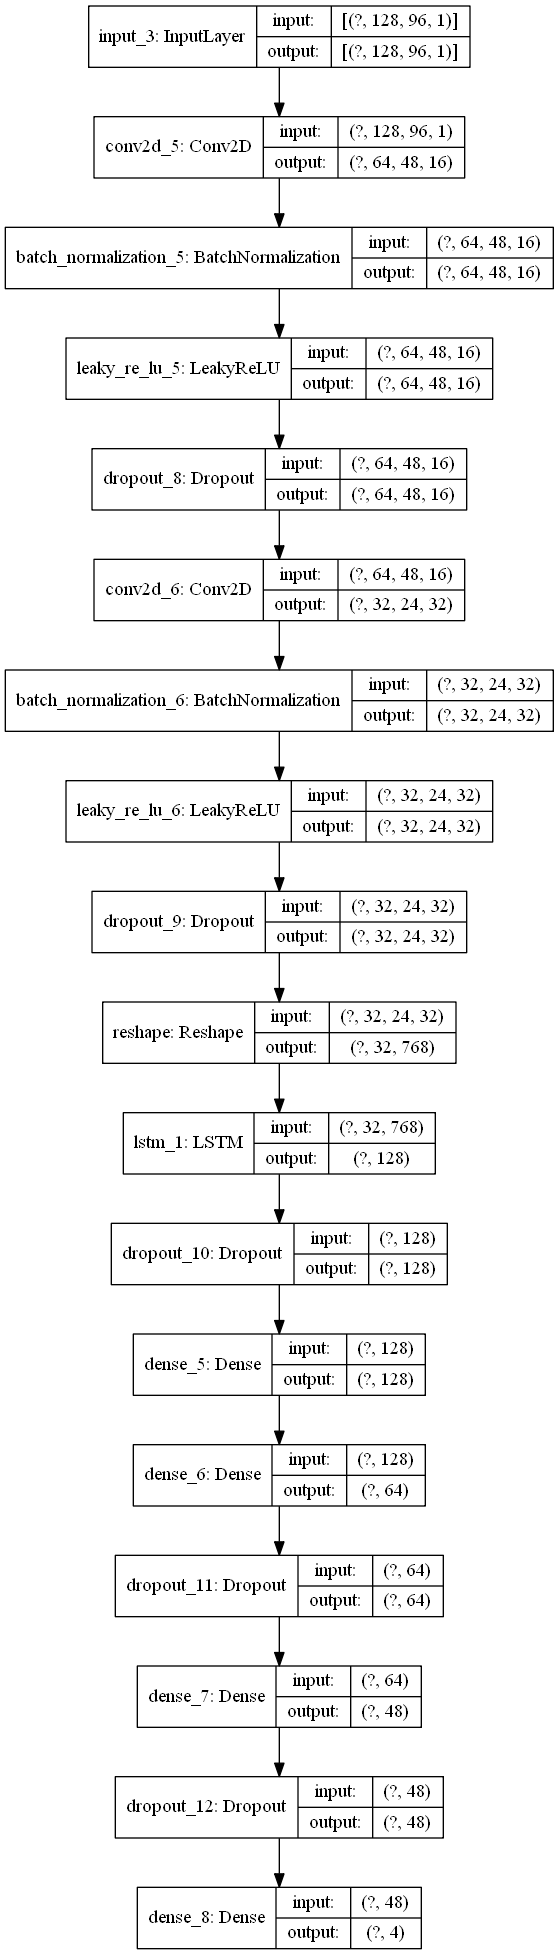

In [21]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
path="./models"
checkpoint = [callbacks.EarlyStopping(monitor='val_accuracy',patience=1000,
restore_best_weights=True),
callbacks.ModelCheckpoint(
    path,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)]

history=model.fit(
    X_train,
    y_train,
    epochs=epoch_hyper,
    batch_size=batch_hyper,
    validation_data=(X_val,y_val),
    verbose=1,
    shuffle=False,
    callbacks=[checkpoint]
)
if(optimizer_hyper==tf.keras.optimizers.Adam):
    nombre=f"modelo_noise_lr_{learning_rates}_btch_{batch_hyper}_epch_{epoch_hyper}_loss_{loss_hyper}_opt_Adam"
    model.save(f"{ruta}{nombre}.h5")
else:
    nombre=f"modelo_noise_lr_{learning_rates}_btch_{batch_hyper}_epch_{epoch_hyper}_loss_{loss_hyper}_opt_SGD.h5"
    model.save(f"{ruta}{nombre}.h5")

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 1.3854 - accuracy: 0.2438
Epoch 00001: val_accuracy improved from -inf to 0.17500, saving model to .\models
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\models\assets
5/5 [==============================] - 16s 3s/step - loss: 1.3854 - accuracy: 0.2438 - val_loss: 1.3836 - val_accuracy: 0.1750
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 1.3817 - accuracy: 0.3562
Epoch 00002: val_accuracy improved from 0.17500 to 0.20000, saving model to .\models
INFO:tensorflow:Assets written to: .\models\assets
5/5 [==============================] - 16s 3s/step - loss: 1.3817 - accuracy: 0.3562 - val_loss: 1.3824 - val_accuracy: 0.2000
Epoch 3/20
5/5 [==============================] - ETA: 0s -

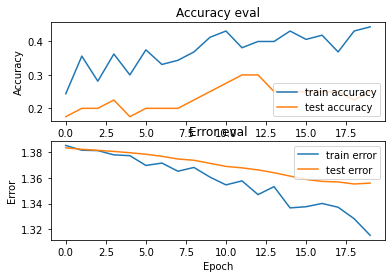

In [19]:
plot_accuracy_loss(history,nombre)

In [24]:
Y_pred=model.predict(X_val)
Y_pred=np.argmax(Y_pred,axis=1)
Confusion_matrix=confusion_matrix(y_val,Y_pred,labels=[0,1,2,3])

In [36]:
disp= ConfusionMatrixDisplay(confusion_matrix=Confusion_matrix,display_labels=['Aircrafts', 'Lluvia', 'Trafico', 'Viento'])

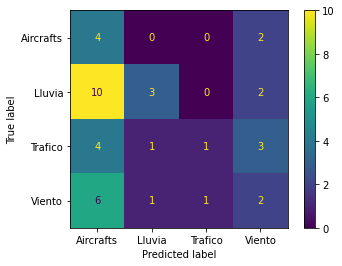

In [37]:
disp.plot()
plt.savefig(f"./Images_confusion/confusion_matrix_{nombre}.png")